### BUSA523_Project_Krishna_Kanth_Dittakavi

In [26]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

# Scikit learn - machine learning algorithms and methods
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

### 1. Perform Exploratory Data Analysis.

In [27]:
# Import data
df = pd.read_csv("cancer.csv")
# Remove any empty spaces
df.columns = df.columns.str.replace(' ', '')
# use 0  for failure of survial instead of 2
df.loc[(df.Survival == 2),'Survival']=0
df

,Age,Year,Auxillarynodes,Survival
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
...,...,...,...,...
300,75,62,1,1
301,76,67,0,1
302,77,65,3,1
303,78,65,1,0


In [28]:
# Summary Statistics
df.describe()

,Age,Year,Auxillarynodes,Survival
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,0.734426
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


<IPython.core.display.Javascript object>


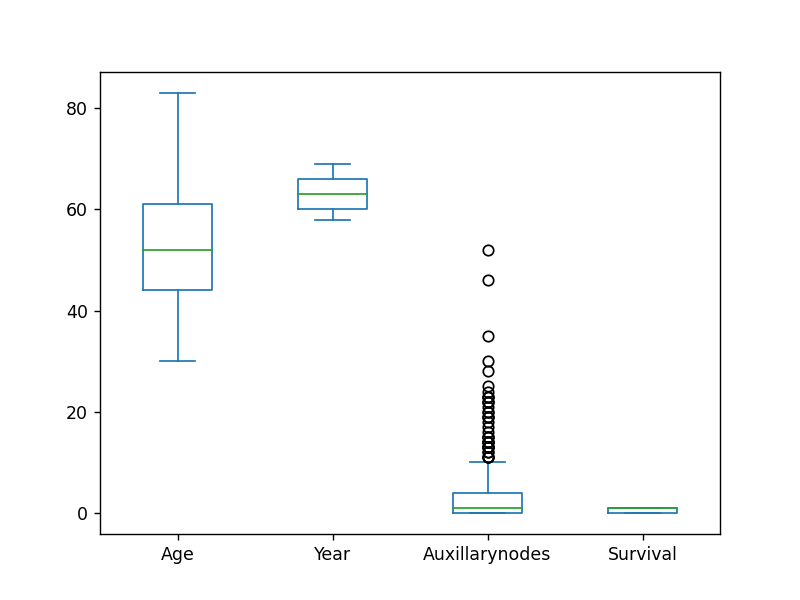

<AxesSubplot:>

In [30]:
# Box plot
%matplotlib notebook
df.plot.box()

### 1.a Deviation of variables
 * There are outliers for the variable Auxillary nodes, needs cleanup.

<IPython.core.display.Javascript object>


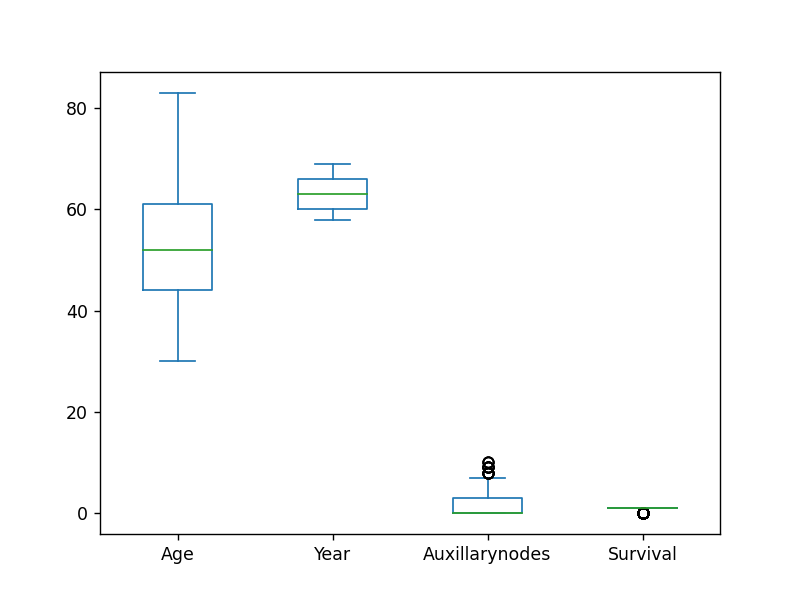

<AxesSubplot:>

In [31]:
# Removing Outliers
# Max = 75% + 1.5* (75% - 25%)
%matplotlib notebook
maximum = 4 + 1.5 * (4 - 0)
df = df[df["Auxillarynodes"] <= maximum]
df.plot.box()

In [32]:
df.describe()

,Age,Year,Auxillarynodes,Survival
count,265.000000,265.000000,265.000000,265.000000
mean,52.683019,62.841509,1.709434,0.781132
std,10.935654,3.266765,2.547002,0.414261
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,0.000000,1.000000
75%,61.000000,66.000000,3.000000,1.000000
max,83.000000,69.000000,10.000000,1.000000


In [7]:
# Correlation
corr = df.corr()
corr

,Age,Year,Auxillarynodes,Survival
Age,1.000000,0.092426,-0.108307,-0.059688
Year,0.092426,1.000000,-0.006921,-0.031328
Auxillarynodes,-0.108307,-0.006921,1.000000,-0.236411
Survival,-0.059688,-0.031328,-0.236411,1.000000


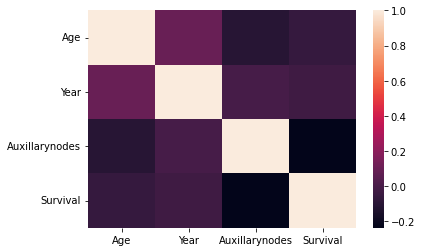

In [8]:
# Visualization - correlation
%matplotlib inline
sns.heatmap(corr)
plt.show()

###  1.b Correlated Variables

* Auxiallary nodes are inversely corelated to the variables- Age & Year.
* Survial is inversely corelated to Age.
* This also does not convey any strong corelation.
* As we have less data ingoring the removal of any corelated variables.

<IPython.core.display.Javascript object>


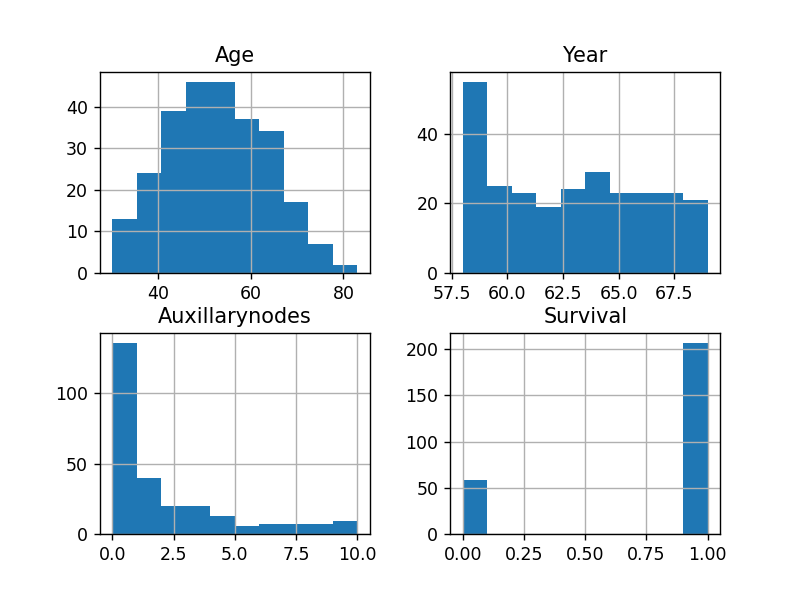

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillarynodes'}>,
        <AxesSubplot:title={'center':'Survival'}>]], dtype=object)

In [33]:
# Skewness
df.hist()

### 1.c Skewnewss

* There is no skewness in Age
* The skewness of survial is binary and expected.
* The skewness of Year and Auxillary nodes is not centered and needs fixing.


In [34]:
# Removing Skewness
df["Year"] = 1/(df["Year"])
df["Auxillarynodes"] = df["Auxillarynodes"]**(0.5)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Auxillarynodes'}>,
        <AxesSubplot:title={'center':'Survival'}>]], dtype=object)

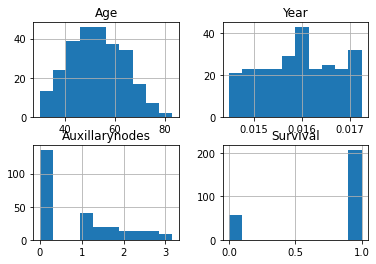

In [11]:
df.hist()

In [35]:
# Standardization
scaler = StandardScaler()
scaler.fit(df)

scaled = scaler.fit_transform(df)
scaled_data = pd.DataFrame(scaled, columns = df.columns)
scaled_data

,Age,Year,Auxillarynodes,Survival
0,-2.078151,0.209264,0.887830,0.529333
1,-2.078151,-0.690624,-0.855899,0.529333
2,-1.986534,1.200665,0.567850,0.529333
3,-1.986534,-0.690624,1.157586,0.529333
4,-1.803300,1.553923,2.327700,0.529333
...,...,...,...,...
260,2.044615,0.209264,0.150843,0.529333
261,2.136233,-1.245778,-0.855899,0.529333
262,2.227850,-0.690624,0.887830,0.529333
263,2.319467,-0.690624,0.150843,-1.889171


In [36]:
#Normalization
normal = MinMaxScaler()
normal.fit(df)
normal = normal.fit_transform(df)
normalized_data = pd.DataFrame(normal, columns = df.columns)
normalized_data

,Age,Year,Auxillarynodes,Survival
0,0.000000,0.595308,0.547723,1.0
1,0.000000,0.324476,0.000000,1.0
2,0.018868,0.893683,0.447214,1.0
3,0.018868,0.324476,0.632456,1.0
4,0.056604,1.000000,1.000000,1.0
...,...,...,...,...
260,0.849057,0.595308,0.316228,1.0
261,0.867925,0.157395,0.000000,1.0
262,0.886792,0.324476,0.547723,1.0
263,0.905660,0.324476,0.316228,0.0


### 2. Develop Supervised learning models

In [37]:
# 2a. Developing and fitting for logistic regression    

def logistic_regression(X_train, X_test, y_train, y_test):
    clf = LogisticRegression(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 10).fit(X_train, y_train)
    clf.score(X_test, y_test)
    clf_pred = clf.predict(X_test)
    return clf, clf_pred

In [38]:
# 2b. Developing and fitting for random forest    

def random_forest(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)
    rf.score(X_test, y_test)
    rf_pred = rf.predict(X_test)
    return rf, rf_pred

In [39]:
# 2c. Developing and fitting the Support Vector Machine

def svm(X_train, X_test, y_train, y_test):
    svm = SVC(random_state = 0, kernel = "rbf", gamma = 1).fit(X_train, y_train)
    svm.score(X_test, y_test)
    svm_pred = svm.predict(X_test)
    return svm, svm_pred


In [40]:
# 2d. Developing and fitting the Neural Network

def neural_network(X_train, X_test, y_train, y_test):
    nn = MLPClassifier(solver = 'lbfgs', max_iter=1000, alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)
    nn_pred = nn.predict(X_test)
    return nn, nn_pred

In [41]:
# 2e. Implement k-fold cross validation

def k_fold_validation(algo, X_train, y_train):
    # Specify the number of splits - 10
    kf = KFold(n_splits=10)
    iteration = 1
    for train_indices, test_indices in kf.split(X_train):
        algo.fit(X_train.iloc[train_indices], y_train.iloc[train_indices])
        print("Accuracy for iteration "+ str(iteration) + " is " + str(algo.score(X_train.iloc[test_indices], y_train.iloc[test_indices])))
        iteration += 1

In [42]:
# 2f. Implement grid search for parameter tuning

parameters = { 
            "logistic_regression" :  {
                                        'C'             :  [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                                        'penalty'       :  ['l1', 'l2'],
                                        'solver'        :  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
                                     },
            "random_forest"       :  { 
                                        'n_estimators'  :  [10, 100, 1000],
                                        'max_features'  :  ['auto', 'sqrt', 'log2'],
                                        'max_depth'     :  [5,6,7,8],
                                        'criterion'     :  ['gini', 'entropy']
                                     },
            "svm"                 :  {
                                        'kernel'        :  ('linear', 'rbf', 'poly'),
                                        'C'             :  [1, 10]
                                     },
            "neural_network"      :  {
                                        'solver'        :  ['lbfgs', 'sgd', 'adam'],
                                        'learning_rate' :  ['constant', 'invscaling', 'adaptive'],
                                        'activation'    :  ['identity', 'logistic', 'tanh', 'relu']
                                     },
        }


def grid_search(algo_response, algo_name,  X_train, y_train):
    grid = GridSearchCV(algo_response, parameters[algo_name])
    grid.fit(X_train, y_train)
    return grid.best_params_

In [43]:
# 4. Function to implement machine learning algorihtm
def machine_learning(data, algorithm):
    X = data.drop(columns = ["Survival"])
    y = data['Survival']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, train_size = 0.6)   

    algo_response, pred = algorithm(X_train, X_test, y_train, y_test)
    
    # Developing the confusion matrix
    cm = confusion_matrix(y_test, pred, labels = algo_response.classes_)
    # Display Confusion Matrix
    print("          " + "Confusion Matrix for", algorithm.__name__)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["Under", "Over"])
    disp.plot()
    # Display ROC Curve
    plot_roc_curve(algo_response, X_test, y_test)
    plt.title('ROC Curve for {}'.format(algorithm.__name__))
    plt.show()
    
    print("Grid Search for ", algorithm.__name__ ) 
    print(grid_search(algo_response, algorithm.__name__, X_train, y_train))
    print("\n")

    print("K Fold Validation for ", algorithm.__name__ ) 
    k_fold_validation(algo_response, X_train, y_train)
    print("\n")

    return classification_report(y_test, pred)

          Confusion Matrix for logistic_regression


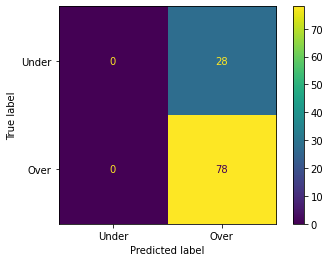

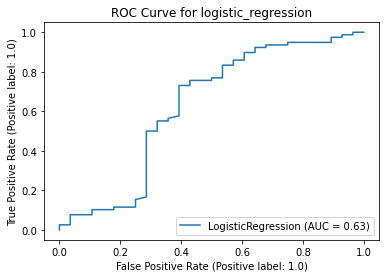

Grid Search for  logistic_regression
{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}


K Fold Validation for  logistic_regression
Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        28
         1.0       0.74      1.00      0.85        78

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



In [21]:
print(machine_learning(normalized_data, logistic_regression))

          Confusion Matrix for random_forest


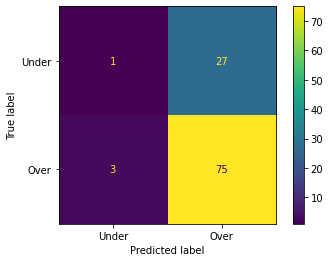

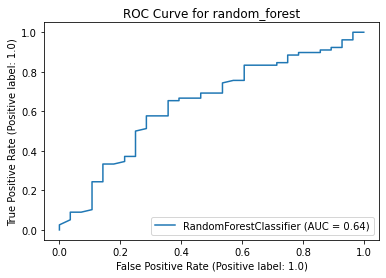

Grid Search for  random_forest
{'criterion': 'gini', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}


K Fold Validation for  random_forest
Accuracy for iteration 1 is 1.0
Accuracy for iteration 2 is 0.8125
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.75
Accuracy for iteration 7 is 0.75
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.625
Accuracy for iteration 10 is 0.8


              precision    recall  f1-score   support

         0.0       0.25      0.04      0.06        28
         1.0       0.74      0.96      0.83        78

    accuracy                           0.72       106
   macro avg       0.49      0.50      0.45       106
weighted avg       0.61      0.72      0.63       106



In [22]:
print(machine_learning(normalized_data, random_forest))

          Confusion Matrix for svm


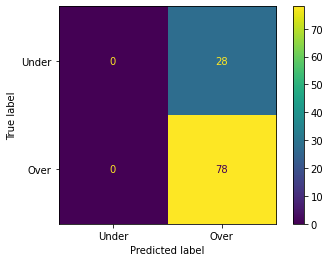

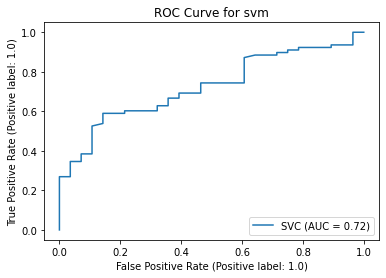

Grid Search for  svm
{'C': 1, 'kernel': 'linear'}


K Fold Validation for  svm
Accuracy for iteration 1 is 0.9375
Accuracy for iteration 2 is 0.75
Accuracy for iteration 3 is 0.8125
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.8125
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.8125
Accuracy for iteration 8 is 1.0
Accuracy for iteration 9 is 0.6875
Accuracy for iteration 10 is 0.7333333333333333


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        28
         1.0       0.74      1.00      0.85        78

    accuracy                           0.74       106
   macro avg       0.37      0.50      0.42       106
weighted avg       0.54      0.74      0.62       106



In [23]:
print(machine_learning(normalized_data, svm))

          Confusion Matrix for neural_network


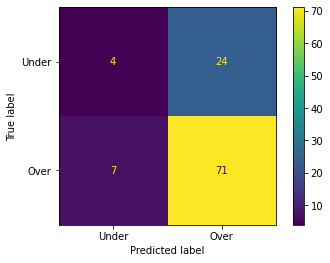

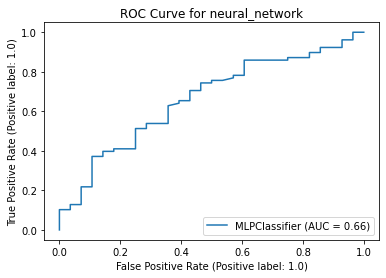

Grid Search for  neural_network
{'activation': 'identity', 'learning_rate': 'constant', 'solver': 'sgd'}


K Fold Validation for  neural_network
Accuracy for iteration 1 is 0.75
Accuracy for iteration 2 is 0.6875
Accuracy for iteration 3 is 0.75
Accuracy for iteration 4 is 0.75
Accuracy for iteration 5 is 0.6875
Accuracy for iteration 6 is 0.8125
Accuracy for iteration 7 is 0.625
Accuracy for iteration 8 is 0.9375
Accuracy for iteration 9 is 0.5625
Accuracy for iteration 10 is 0.7333333333333333


              precision    recall  f1-score   support

         0.0       0.36      0.14      0.21        28
         1.0       0.75      0.91      0.82        78

    accuracy                           0.71       106
   macro avg       0.56      0.53      0.51       106
weighted avg       0.65      0.71      0.66       106



In [24]:
print(machine_learning(normalized_data, neural_network))

## The best model for this problem is SVM

### 3.  Accuracy
 * The Algorithms are overfitting as there is a high variance and low bias, the accuracy rates are low for the test data, even while using 60 percent of the given data as training data. 
 * The behaviour of overfitting can also be observed from K fold validation as the average accuracy goes down.
 * Using both normalized data (normalized_data) and the data frame after analysis(df) yeild same results.